# Tutorial Sub-aggregated Temporal network 

In [1]:
#load SubTempNet Class
from SubTempNet import *
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Synthetic ER Temporal Network
We create and analyze a synthetic temporal network where every snapshot is a ER network.

In [ ]:
#Create ER Temporal network
n = 100 #number of nodes
p = 0.0001 #edge probability
t = 15000 #length of temporal network 
name = "data/ER/ER_ud_n"+str(n)+"_p"+str(p)[2:]+"_T"+str(t)+".edges" #name to save temporal network

#create list with t snapshots
A = [nx.gnp_random_graph(n, p, seed=None, directed=False) for i in range(t)] 

#ensure that first and last snapshot contains edge
if len(A[0].edges()) ==0:
    u,v = np.random.choice(range(n),2,replace = False ) 
    A[0].add_edge(u,v)
if len(A[-1].edges()) ==0:
    u,v = np.random.choice(range(n),2,replace = False )
    A[-1].add_edge(u,v)

#save temporal network as edgelist
SubTempNet.write_snapshotlist_to_edgelist(A, name, separator='\t') 

In [2]:
#Create Object with created edgelist 
filepath ="data/ER/ER_ud_n100_p0001_T15000.edges" #path of the edgelist we want to analyze. It must be a tap-separated list containinga all edges (u,v,t) in the form "u \tap v \tap t"
objname = "ER_n100_p0001" #name we want to use to save simulation results and plots
directed = False #Bool if the temporal network is directed (True) or undirected (False)
init = False #Bool if we want to create a new Object or if we want to load an existing one 

#Instantiate Object:
STN= SubTempNet(filepath,objname,directed= directed, init = init)

The object inherits from the dictionary class and therefore also can be accessed like a dictionary. Bellow we see all accessible keys:

In [11]:
STN.keys()

dict_keys(['filename', 'objname', 'directed', 'A', 'ecount', 'ncount', 'T', 'deg_seq', 'PA0', 'PAT', 'PAT2', 'PAT4', 'PAT8', 'PAT_LCC'])

- STN[ 'filename' ] = filename of the edgelist that is passt to the class when first instatiated
- STN[ 'objname' ] = objectname that is passt to the class when first instatiated
- STN[ 'directed' ] = BOOL if the temporal network is directed or undirected
- STN[ 'A' ] = snapshotlist (sparse matrixes)
- STN[ 'ecount' ] = number of temporal edges in the edgelist
- STN[ 'ncount' ] = number of nodes
- STN[ 'T' ] = length of the temporal network
- STN[ 'det_seq' ] = degree sequence of fully aggregated static network
- STN[ 'PA*' ] = dictionary saving the number of accessibility edges for aggregation depth *. The key is the length of the temporal network sample. The value is a list containing the number of accessibility edges for each sample.
- STN[ 'PAT_LCC' ] = Size of largest connected component (LCC) for different temporal network sample lengths


By using print() on the object STN, we get the most important informations about the temporal network and the object

In [3]:
print(STN)

filename =	data/ER/ER_ud_n100_p0001_T15000.edges
objname =	ER_n100_p0001_SubTempNet
directed =	False
ncount = 	100
ecount = 	7366
T = 		15000



[1, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 14, 16, 19, 22, 26, 30, 35, 41, 48, 57, 66, 78, 91, 106, 124, 145, 169, 198, 231, 270, 316, 369, 432, 504, 589, 689, 805, 940, 1099, 1284, 1500, 1752, 2048]


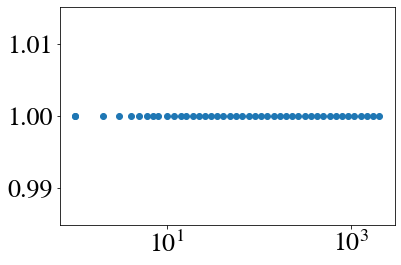

In [4]:
#We want to sample temporal networks of different lengths, we consider 50 logspaced values on a meaningfull range
num = 50
T = sorted([1]+list(set(np.logspace(np.log10(2048),np.log10(1), num, dtype = int))))
print(T)
plt.scatter(T, len(T)*[1])
plt.xscale("log")

We call "STN.run(*T,  maxsamp, minsamp)" with
- *T: values for temporal network sample lengths
- maxsample: maximal number of samples that should be analysed for a given  T
- minsample: minimal number of samples that schould be analysed for a given T, This is not respected for large T since the samples overlap too much

In [94]:
STN.run(*T,  maxsamp = 50, minsamp = 5)

Done with samplelengths  [49382, 39607, 31768, 25480, 20437, 16392, 13147, 10545, 8458, 6783, 5441, 4364, 3500, 2807, 2251, 1806, 1448, 1161, 931, 747, 599, 480, 385, 309, 248, 199, 159, 128, 102, 82, 66, 52, 42, 34, 27, 21, 17, 14, 11, 9, 7, 5, 4, 3, 3]
Analyzing sample number 51 for samplelength  2


In [ ]:
STN.save() #saves the simulation results in obj folder. Allows to reload results ufter jupyter shutdown

C:\ProgramData\Anaconda3\lib\site-packages\numpy\ma\core.py:6666: RuntimeWarning: underflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


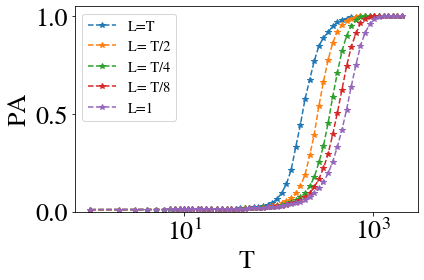

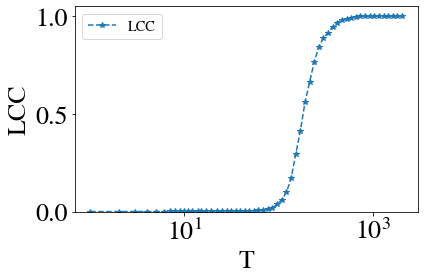

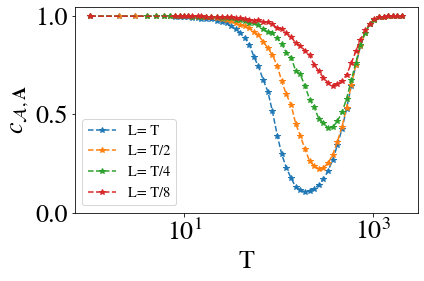

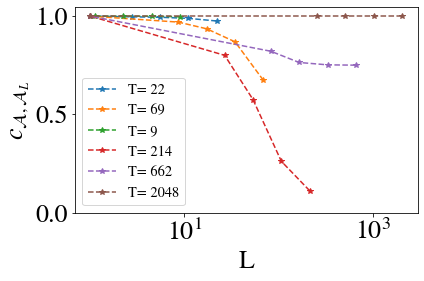

In [5]:
STN.plot_PA(normalize=True, LCC = False)
STN.plot_LCC(normalize=True, ACC = False)
STN.plot_cA0AT()
STN.plot_cA0AL(10,20,2,30,40,50)

# Empirical Temporal Network
We analyze a empirical temporal network and create a synthetic temporal network that preserves the expected degree sequence.

## Original

In [6]:
filename = "data/highschool2012.edges"
objname= "highschool2012"
STN = SubTempNet(filename, objname, directed= True, init = False)

In [7]:
print(STN)

filename =	data/highschool2012.edges
objname =	highschool2012_SubTempNet
directed =	True
ncount = 	92
ecount = 	9827
T = 		49382



In [ ]:
num = 50
T = sorted([1]+list(set(np.logspace(np.log10(5846),np.log10(1), num, dtype = int))))
print(T)
plt.scatter(T, len(T)*[1])
plt.xscale("log")

In [ ]:
STN.run(*T,  maxsamp = 30, minsamp = 5)

In [ ]:
STN.plot_PA(normalize=True, LCC = False)
STN.plot_LCC(normalize=True, ACC = False)
STN.plot_cA0AT()
STN.plot_cA0AL(2,4,6,8)

## EDS

In [9]:
#Create EDS Temporal network
name = "data/"+ STN["objname"][:-11]+"_EDS.edges"
deg = STN["deg_seq"]/STN["T"]
A = []
for t in range(int(1.5*STN["T"])):
    A.append(STN.ChungLu(deg))
#check that first and last snapshot contain at least one edge
if len(A[0].edges()) ==0:
    u,v = np.random.choice(range(STN["ncKount"]),2,replace = False )
    A[0].add_edge(u,v)
if len(A[-1].edges()) ==0:
    u,v = np.random.choice(range(STN["ncount"]),2,replace = False )
    A[-1].add_edge(u,v)
#save edgelist
SubTempNet.write_snapshotlist_to_edgelist(A, name, separator='\t')

In [11]:
filename = "data/highschool2012_EDS.edges"
objname= "highschool2012_EDS"
STN = SubTempNet(filename, objname, directed= False, init = True)

In [12]:
print(STN)

filename =	data/highschool2012_EDS.edges
objname =	highschool2012_EDS_SubTempNet
directed =	False
ncount = 	92
ecount = 	14237
T = 		74073



In [ ]:
STN.run(*T,  maxsamp = 30, minsamp = 5)

In [13]:
STN.save()

In [ ]:
STN.plot_PA(normalize=True, LCC = False)
STN.plot_LCC(normalize=True, ACC = False)
STN.plot_cA0AT()
STN.plot_cA0AL(2,4,6,8)